# Part 3: Statistics

## Introduction
In this section, we will demonstrate how Python can be used to randomly sample from distributions, and plot these results; we will also calculate sample statistics.

## Import libraries
For this section, we will need `numpy` once again for mathematical purposes as well as for sampling. We will need `matplotlib.pyplot` again for plotting our results, and we will neep `scipy.stats` to access the Gaussian distribution's PDF later on in this exercise.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Problems

### 1) Drawing a sample of size 100
Here, we are tasked with generating a random sample of size $100$ from a $U(0,1)$ distribution. Let's use `numpy`'s random subpackage to draw these uniform variables:

In [12]:
# Loop 100 times
sample = []
for i in range(0, 100, 1):

    # Generate a variable
    rv = np.random.uniform(0, 1)
    sample.append(rv)

Now, let's plot the sample using `pyplot.hist()`:

Text(0, 0.5, 'Count')

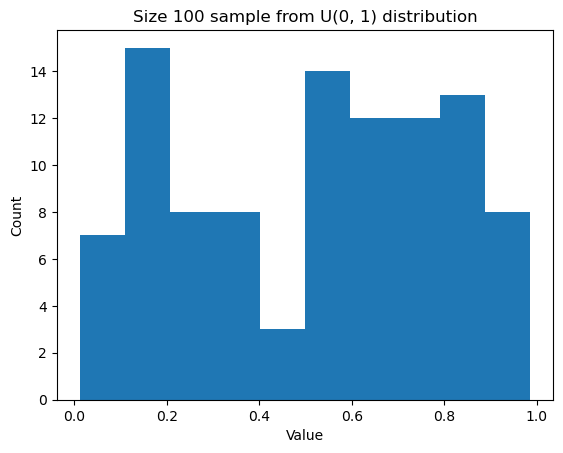

In [17]:
plt.hist(sample)
plt.title("Size 100 sample from U(0, 1) distribution")
plt.xlabel("Value")
plt.ylabel("Count")

And we can calculate the mean and variance using `numpy`:

In [20]:
mean = np.mean(sample)
var = np.var(sample)
print(mean, var)

0.518515166226685 0.07857572847442337


The mean and variance are close to what we'd expect; for a $U(0,1)$ distribution, mean $\mu=\frac{a + b}{2}$ and variance $\sigma^2=\frac{(b - a)^2}{12}$, and here, the sample mean $\overline X$ and the sample variance $S^2$ are close to the expected values of $\mu=0.5$ and $\sigma^2=0.083$.

We can do the same thing for a sample size of $1000$, too:

0.5173602505174169 0.08621398523003612


Text(0, 0.5, 'Count')

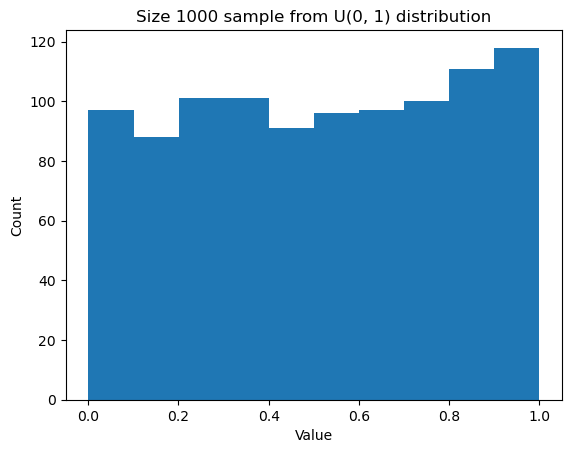

In [32]:
# Loop 1000 times
sample = []
for i in range(0, 1000, 1):

    # Generate a variable
    rv = np.random.uniform(0, 1)
    sample.append(rv)

# Calculate mean and variance
mean = np.mean(sample)
var = np.var(sample)
print(mean, var)

# Plot
plt.hist(sample)
plt.title("Size 1000 sample from U(0, 1) distribution")
plt.xlabel("Value")
plt.ylabel("Count")

As expected, the larger sample size has resulted in the plot resembling what the uniform distribution's plot would look like much more, and the mean and variance are closer to their true population values.

### 2) Creating a sampling distribution for the population mean
We will now shift our focus to an example where we replicate our above procedure $1000$ times and look at the distribution of the sample means. To begin, let's define a function that draws a sample of size $k$:

In [33]:
def unif_sample(k):
    
    # Loop k times
    sample = []
    for i in range(0, k, 1):

        # Generate a variable
        rv = np.random.uniform(0, 1)
        sample.append(rv)

    # Return the sample
    return sample

Now, let's sample $1000$ times, and store the means:

In [39]:
sample_means = []

for i in range(0, 1000, 1):
    x = np.mean(unif_sample(1000))
    sample_means.append(x)

To plot our sampling distribution of the sample mean $x$, we use a similar procedure as with last problem, but we're going to use a density histogram rather than a count histogram this time:

Text(0, 0.5, 'Density')

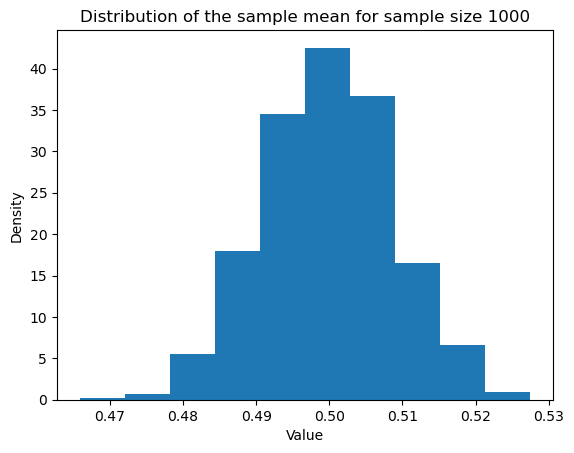

In [46]:
plt.hist(sample_means, density = True)
plt.title("Distribution of the sample mean for sample size 1000")
plt.xlabel("Value")
plt.ylabel("Density")

We can already see a quasi-Gaussian shape emerging, but let's overlay the recommended Gaussian with $\mu=0.5$ and $\sigma^2=8.333\times10^{-5}$ to see the comparison at work:

Text(0.5, 0, 'Support')

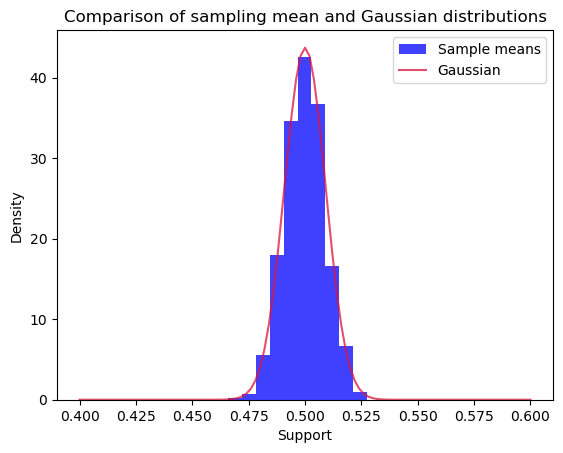

In [54]:
# Define Gaussian PDF 
x = np.linspace(0.4, 0.6, 101)
gaussian = stats.norm.pdf(x, loc = 0.5, scale = np.sqrt(8.333 * 10 ** (-5)))

# Set up subplot
fig, ax = plt.subplots()

# Plot histogram
means = ax.hist(sample_means, density = True, color = "blue", label = "Sample means", alpha = 0.75)

# Plot Gaussian
gaussian_plot, = ax.plot(x, gaussian, color = "crimson", label = "Gaussian", alpha = 0.75)

# Label plot
ax.legend()
ax.set_title("Comparison of sampling mean and Gaussian distributions")
ax.set_ylabel("Density")
ax.set_xlabel("Support")

We can see very clearly here the *Central Limit Theorem* at work again &mdash; as the number of sample means becomes higher, the Gaussian distribution more accurately estimates the sampling distribution. However, there is still some level of mismatch between the two plots, noticeable in the histogram's asymmetric nature. This is due to the fact that $1000$ samples, while high, is still relatively far from infinity, and thus isn't perfectly represented by the Gaussian distribution. Should the number of samples taken be orders of magnitude higher, a stronger relationship between the histogram and Gaussian plot may emerge.